# 숫자 순차열 데이터 예측 Template

# 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

숫자열이 1개라도 2차원 배열에 답는다. 

In [2]:
numbers = np.zeros((2000,1))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))

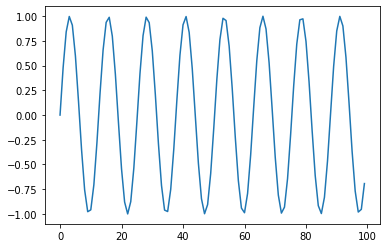

In [3]:
plt.plot(numbers[:100,0])
plt.show()

In [4]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

12345678901234567890의 숫자열로 다음의 입출력 데이터를 생성한다.
```
12345 -> 6
23456 -> 7
34567 -> 8
...
56789 -> 0
```

In [11]:
raw_x = []
raw_y = []

MAX_SAMPLE_COUNT = len(numbers)-(SEQUENCE_LENGTH+OFFSET)+1
SAMPLING_COUNT = MAX_SAMPLE_COUNT
for j in range(SAMPLING_COUNT):
  i = np.random.randint(MAX_SAMPLE_COUNT)
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x->   = [3:8] = 45678
#                      y  = [8]   = 9



In [ ]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [ ]:
print(raw_x[0])

[[0.        ]
 [0.47942554]
 [0.84147098]
 [0.99749499]
 [0.90929743]]


In [ ]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, shuffle=True)


print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 1)
(1994, 1)
Training Data:
(1794, 5, 1)
(1794, 1)
Test Data:
(200, 5, 1)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[ 0.98360406]
 [ 0.94965409]
 [ 0.68319568]
 [ 0.24946714]
 [-0.24533966]]

train_y[0]
 [-0.68007875]


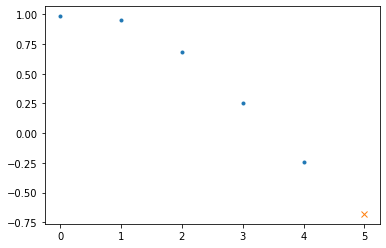

In [ ]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')
plt.show()

# DNN 사용

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


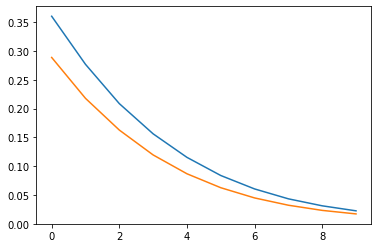

7/7 [==============================] - 0s 3ms/step - loss: 0.0209 - mae: 0.1176
loss= 0.020861124619841576
mae= 0.11763329803943634
(200, 1)
(200, 1)


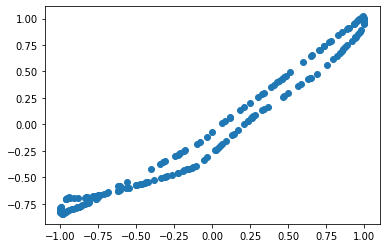

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
print(test_y.shape)
print(y_.shape)
plt.scatter(test_y.squeeze(), y_)
plt.show()

# Template

## LSTM

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 67,861
Trainable params: 67,861
Non-trainable params: 0
_________________________________________________________________


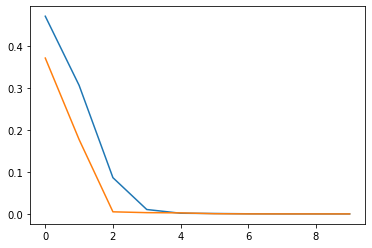

7/7 [==============================] - 0s 4ms/step - loss: 4.3619e-05 - mae: 0.0057
loss= 4.3618994823191315e-05
mae= 0.005686040036380291


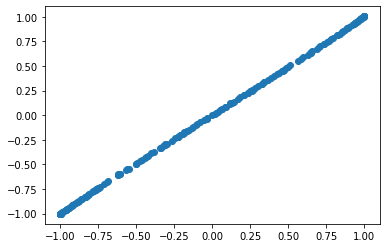

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## GRU

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51,605
Trainable params: 51,605
Non-trainable params: 0
_________________________________________________________________


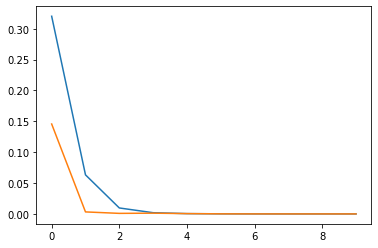

7/7 [==============================] - 0s 3ms/step - loss: 3.9383e-06 - mae: 0.0016
loss= 3.938296686101239e-06
mae= 0.0016246178420260549


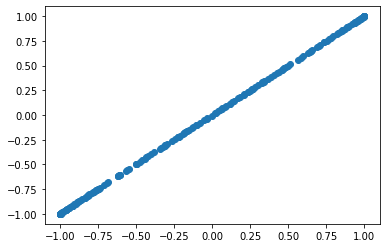

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(GRU(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + LSTM

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              133120    
 l)                                                              
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 135,701
Trainable params: 135,701
Non-trainable params: 0
_________________________________________________________________


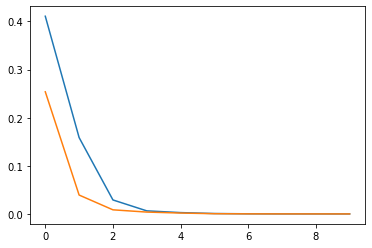

7/7 [==============================] - 0s 4ms/step - loss: 6.1372e-05 - mae: 0.0058
loss= 6.137207674328238e-05
mae= 0.005842313636094332


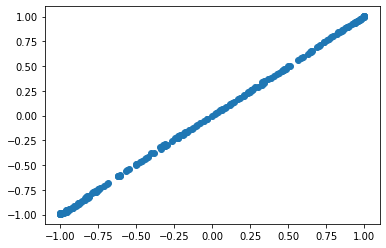

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(LSTM(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + GRU

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              100608    
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 103,189
Trainable params: 103,189
Non-trainable params: 0
_________________________________________________________________


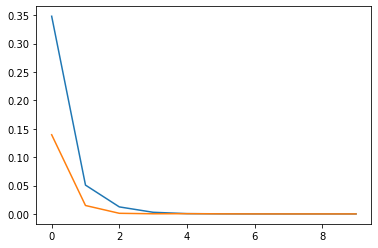

7/7 [==============================] - 0s 3ms/step - loss: 1.1252e-06 - mae: 8.6885e-04
loss= 1.1252236618020106e-06
mae= 0.000868848292157054


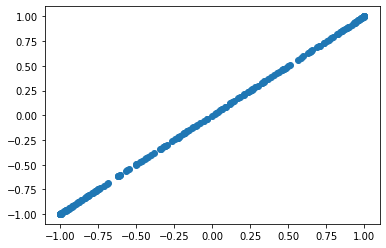

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Bidirectional(GRU(128)))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## stacked

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            66560     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 flatten_5 (Flatten)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 199,445
Trainable params: 199,445
Non-trainable params: 0
_________________________________________________________________


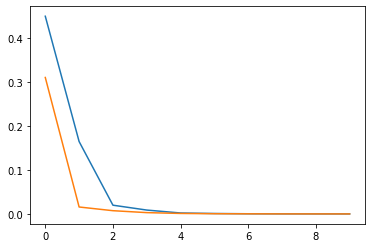

7/7 [==============================] - 0s 5ms/step - loss: 5.2776e-05 - mae: 0.0056
loss= 5.2775787480641156e-05
mae= 0.0056479270569980145


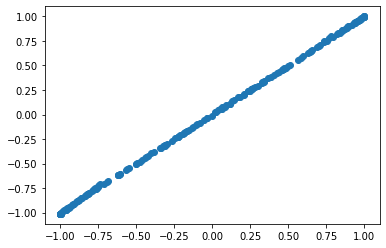

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                  

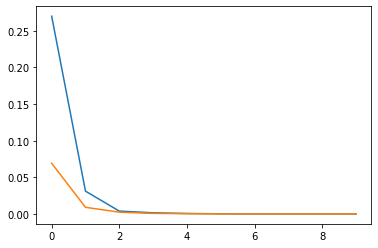

7/7 [==============================] - 0s 4ms/step - loss: 3.3883e-05 - mae: 0.0048
loss= 3.388255208847113e-05
mae= 0.004762789234519005


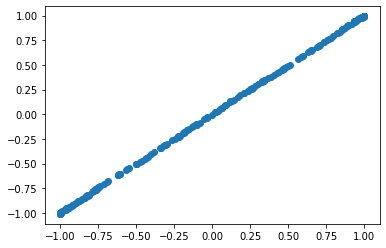

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape
1

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN + LSTM

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 32)             128       
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 lstm_4 (LSTM)               (None, 128)               82432     
                                                                 
 flatten_7 (Flatten)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 86,965
Trainable params: 86,965
Non-trai

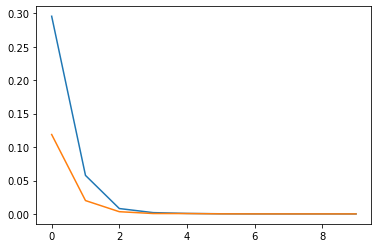

7/7 [==============================] - 0s 3ms/step - loss: 6.2293e-05 - mae: 0.0066
loss= 6.229300197446719e-05
mae= 0.006574156228452921


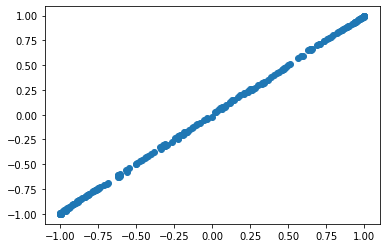

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten, Input
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape
1

input_shape = train_x.shape[1:]
# input_shape = (5,1)

model = keras.Sequential()
model.add(Input(input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(10, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()